In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [34]:
# Importing data
data = pd.read_csv('cancer_reg.csv') 

# Drop non-numeric columns that aren't needed for correlation analysis
data = data.select_dtypes(include=[np.number])

# Display information about the dataset
data.info()  # Overall Information
data.describe()  # Display summary statistics of the dataset
print(data.dtypes)

# Creating feature variables
X = data.drop('avgdeathsperyear', axis=1) 
y = data['avgdeathsperyear'] 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   medianage                3047 non-null   float64
 9   medianagemale            3047 non-null   float64
 10  medianagefemale          3047 non-null   float64
 11  percentmarried           3047 non-null   float64
 12  pctnohs18_24             3047 non-null   float64
 13  pcths18_24               3047 non-null   float64
 14  pctsomecol18_24         

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the scaled data for train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Convert NumPy arrays back to Pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Check for missing values
print(X_train.isnull().sum())

# Fill missing values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training data mean for consistency

avganncount                   0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            1593
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over           95
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     425
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrate                     0
dtype: int64


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with max_depth parameter
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=101)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)


In [37]:
from sklearn.metrics import r2_score

# Compute R^2 score
r2 = r2_score(y_test, rf_predictions)

# Print results
print('Random Forest Regression Results:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_predictions)) 
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_predictions)) 
print('R² Score:', r2)

Random Forest Regression Results:
Mean Squared Error: 59547.034439955496
Mean Absolute Error: 28.074009695670703
R² Score: 0.8410293214861663


c:\Users\stuti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


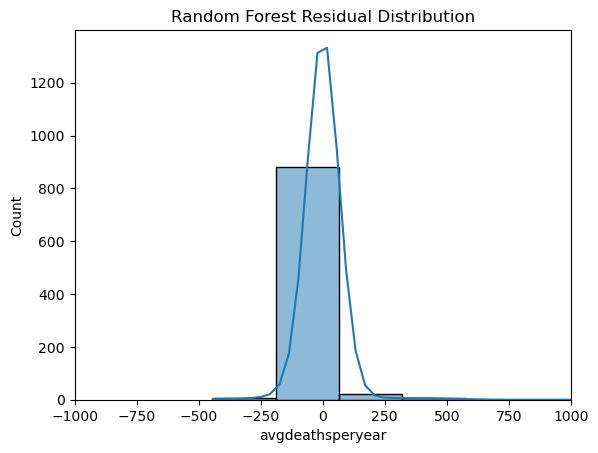

In [38]:
# Residual Plot (to check error distribution)
rf_residuals = y_test - rf_predictions
sns.histplot(rf_residuals, kde=True, bins=30)
plt.title("Random Forest Residual Distribution")
plt.xlim(-1000, 1000)
plt.show()


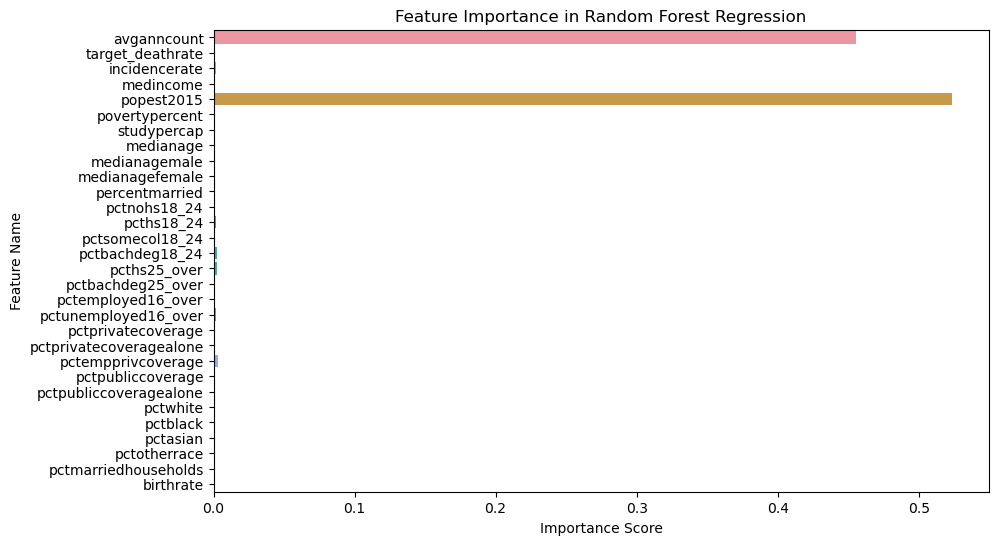

In [39]:
importances = rf_model.feature_importances_  # Get feature importances
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Regression")
plt.show()

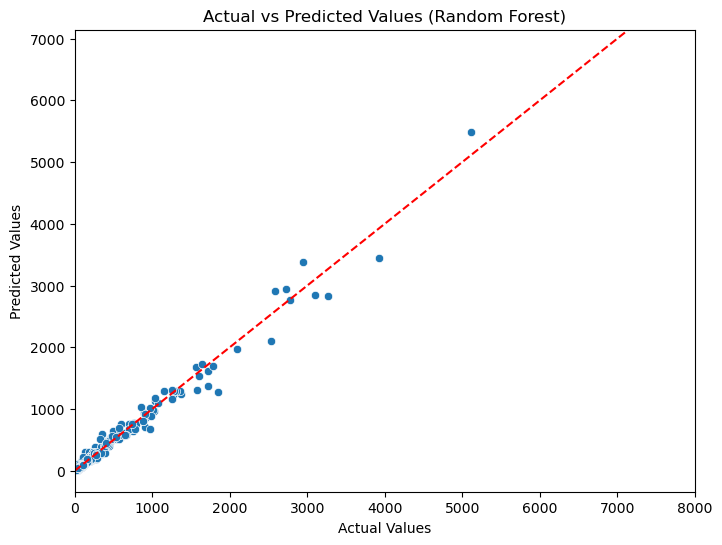

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.axline([0, 0], [1, 1], color='red', linestyle='--')  # Ideal fit line
plt.xlim(0, 8000)
plt.show()


c:\Users\stuti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


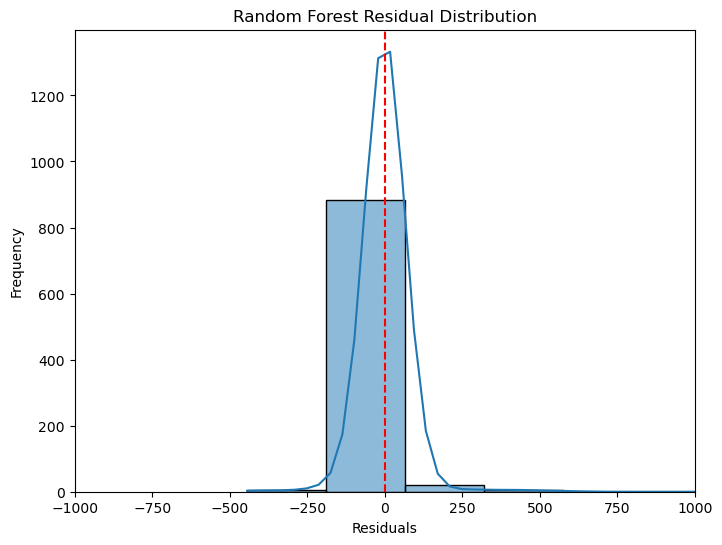

In [41]:
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')  # Centered at zero
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.xlim(-1000, 1000)
plt.title("Random Forest Residual Distribution")
plt.show()


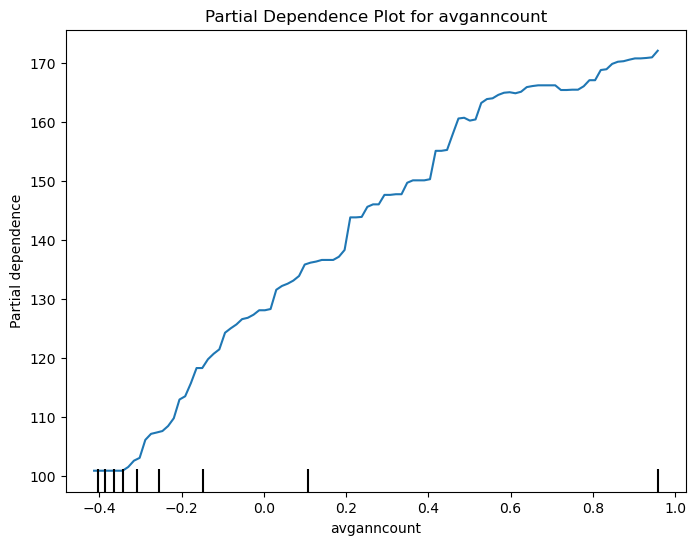

In [42]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=[0], ax=ax)  # Change `features=[0]` to any feature index
plt.title(f"Partial Dependence Plot for {X.columns[0]}")
plt.show()


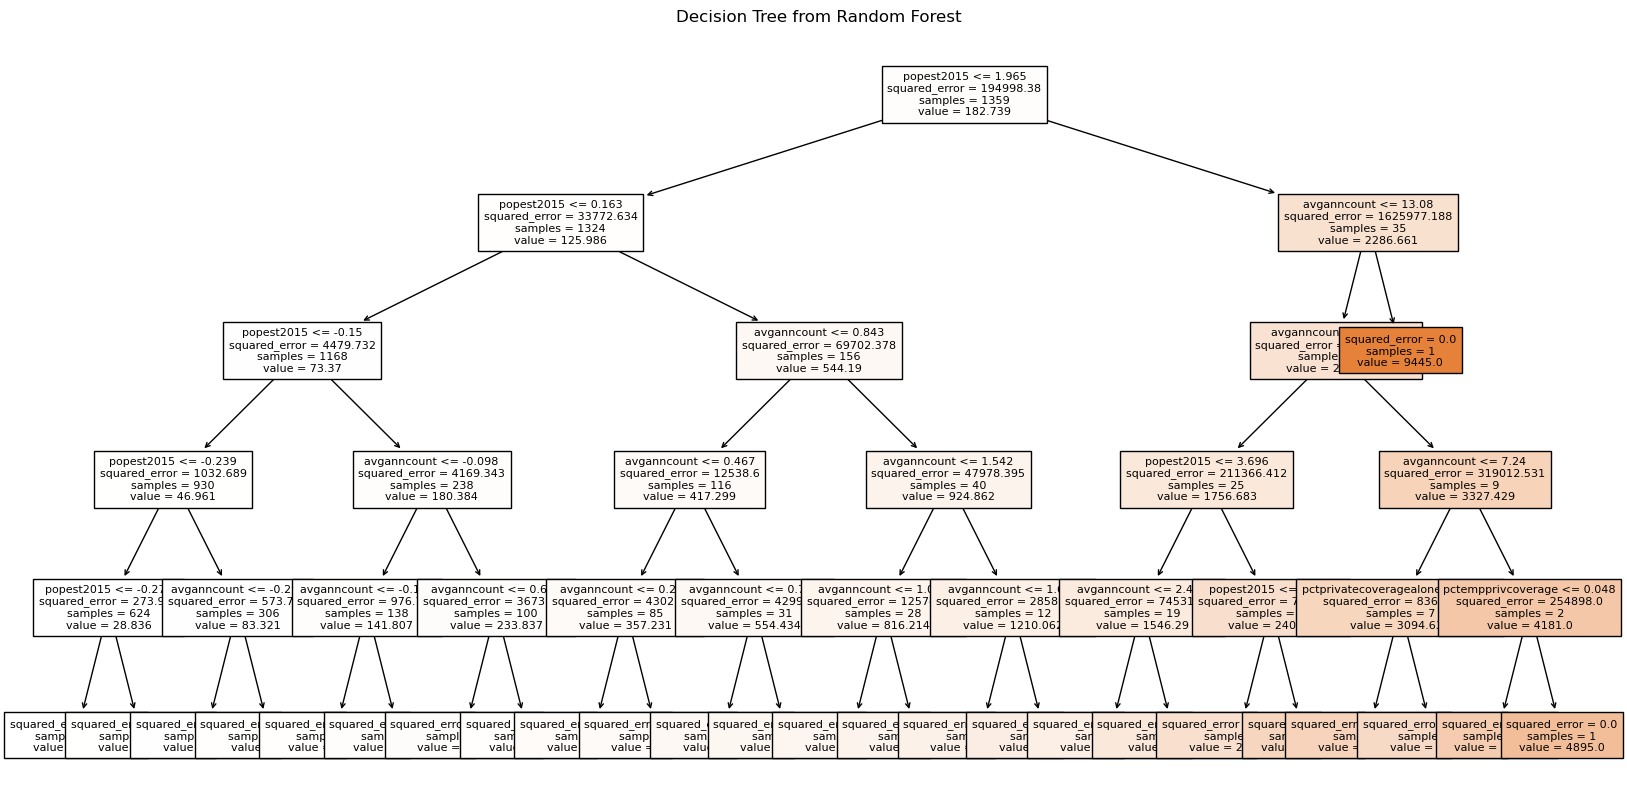

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, fontsize=8)
plt.title("Decision Tree from Random Forest")
plt.show()
